<a href="https://colab.research.google.com/github/Almjes/Almejes/blob/main/Nvida4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import numpy as np
from scipy.stats import nbinom
import pandas as pd
from scipy.stats import norm
import random
import seaborn as sns
from array import array


# Defina a semente para o gerador de números aleatórios
random.seed(42)

In [ ]:

df_info = pd.DataFrame(columns=['Distribuição','Qtde interações', 'Esperança Sag', 'Desvio padrão', 'Esperança sinistros', 'Desvio padrão sinistros', 'Prêmio Estatístico', 'Prêmio Puro', 'capital_risco_05', 'capital_risco_003', 'capital_acionista U0', 'capital_acionista U1', 'Maximo severidade', 'Minimo severidade'])


## Silmulação inicio
- Gamma

In [ ]:

cenarios = 500
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade # multiplicação das matrizes
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)


Serie_500_gamma = Soma_sev

In [ ]:
Serie_500_gamma= Soma_sev
Serie_500_gamma=pd.DataFrame({'serie_500_gamma':Serie_500_gamma})
Serie_500_gamma.to_excel('serie_500_gamma.xlsx', index=False)

# Montagem da tabela Gamma 500 iterações

In [ ]:

media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
    'Distribuição':'Gamma',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.4,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97


## Gráfico

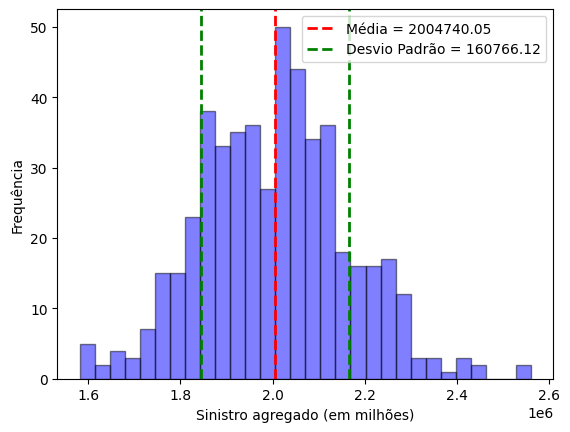

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Montagem da tabela Gamma 5000 iterações

In [ ]:

cenarios = 5000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)


In [ ]:
Serie_5000_gamma= Soma_sev
Serie_5000_gamma=pd.DataFrame({'serie_5000_gamma':Serie_5000_gamma})
Serie_5000_gamma.to_excel('serie_5000_gamma.xlsx', index=False)

In [ ]:
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.4,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.4,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76


### Gráfico

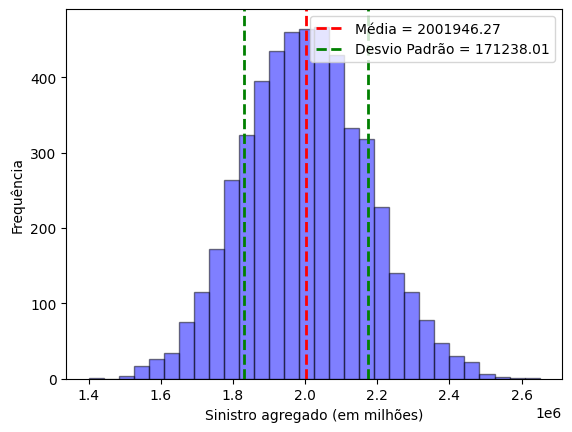

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

# Montagem da tabela Gamma 50.000 iterações

In [ ]:
cenarios = 30000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)

In [ ]:
Serie_50000_gamma= Soma_sev
Serie_50000_gamma=pd.DataFrame({'serie_50000_gamma':Serie_50000_gamma})
Serie_50000_gamma.to_excel('serie_50000_gamma.xlsx', index=False)

In [ ]:
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.4,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.4,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.0,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01


### Gráfico

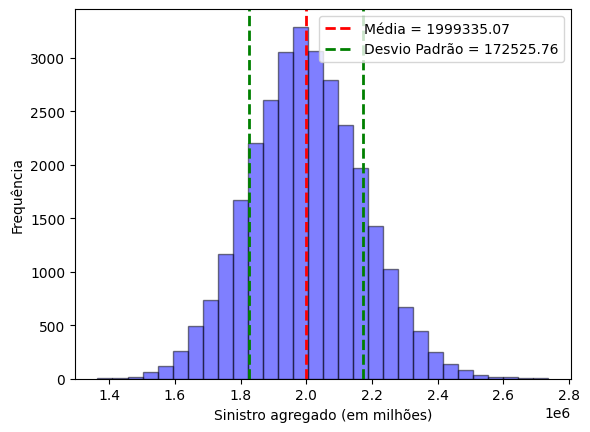

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

# Distribuição exponencial 500

In [ ]:
cenarios = 500
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição exponencial
beta = 10000


# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.exponential(scale= beta, size=(tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)

In [ ]:
Serie_500_exp= Soma_sev
Serie_500_exp=pd.DataFrame({'Serie_500_exp':Serie_500_exp})
Serie_500_exp.to_excel('Serie_500_exp.xlsx', index=False)

In [ ]:
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
    'Distribuição':'Exponencial',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.4,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.4,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.0,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.4,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25


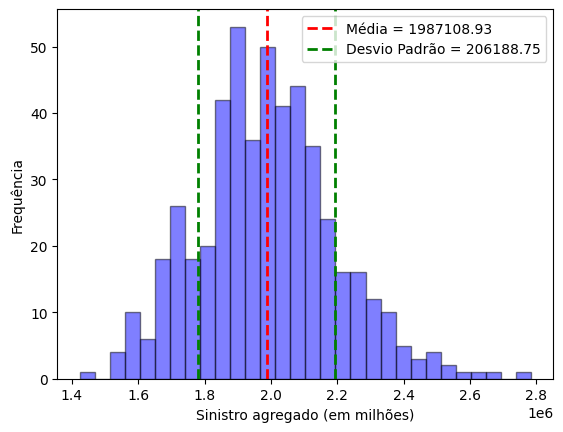

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

# Distribuição exponencial 5000

In [ ]:
cenarios = 5000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição exponencial
beta = 10000


# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.exponential(scale= beta, size=(tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)

In [ ]:
Serie_5000_exp= Soma_sev
Serie_5000_exp=pd.DataFrame({'Serie_5000_exp':Serie_5000_exp})
Serie_5000_exp.to_excel('Serie_5000_exp.xlsx', index=False)

In [ ]:
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Exponencial',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.4,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.4,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.0,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.4,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.4,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73


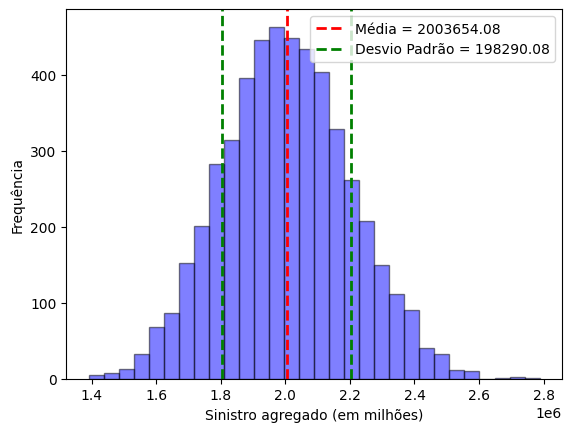

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Distribuição exponencial 50000

In [ ]:
cenarios = 30000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição exponencial
beta = 10000


# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.exponential(scale= beta, size=(tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
Soma_sev =matriz_final_severidade.sum(axis = 0)

qtd_sin_cen =matriz_sinistros.sum(axis = 0)

In [ ]:
Serie_50000_exp= Soma_sev
Serie_50000_exp=pd.DataFrame({'Serie_50000_exp':Serie_50000_exp})
Serie_50000_exp.to_excel('Serie_50000_exp.xlsx', index=False)

In [ ]:
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Exponencial',
   'Qtde interações': cenarios,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48


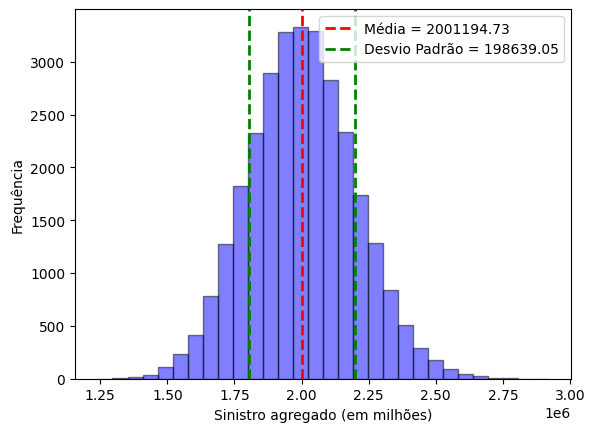

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Risco coletivo

### Gamma vs Binomial negativa (500)

In [ ]:
# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08
np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)

array([237])

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma


# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08


# Quantidade de réplicas de Monte Carlo
B = 500

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]
for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)
    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_500_gamma_BN= Soma_sev
Serie_500_gamma_BN=pd.DataFrame({'Serie_500_gamma_BN':Serie_500_gamma_BN})
Serie_500_gamma_BN.to_excel('Serie_500_gamma_BN.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39


In [ ]:
Serie_5000_gamma_BN= Soma_sev
Serie_5000_gamma_BN=pd.DataFrame({'Serie_5000_gamma_BN':Serie_5000_gamma_BN})
Serie_5000_gamma_BN.to_excel('Serie_5000_gamma_BN.xlsx', index=False)

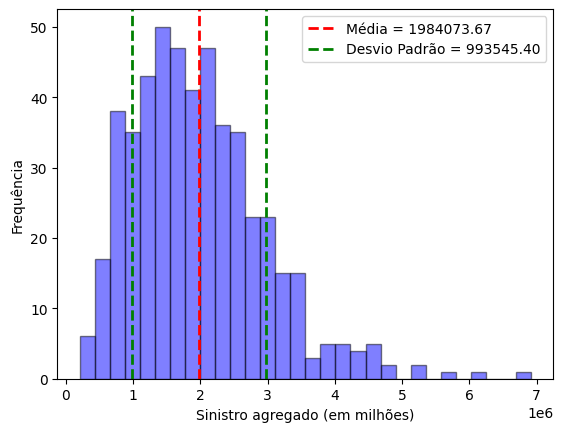

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Gamma vs Binomial negativa (5000)

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma


# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08


# Quantidade de réplicas de Monte Carlo
B = 5000

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]
for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)
    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_5000_gamma_BN= Soma_sev
Serie_5000_gamma_BN=pd.DataFrame({'Serie_5000_gamma_BN':Serie_5000_gamma_BN})
Serie_5000_gamma_BN.to_excel('Serie_5000_gamma_BN.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86


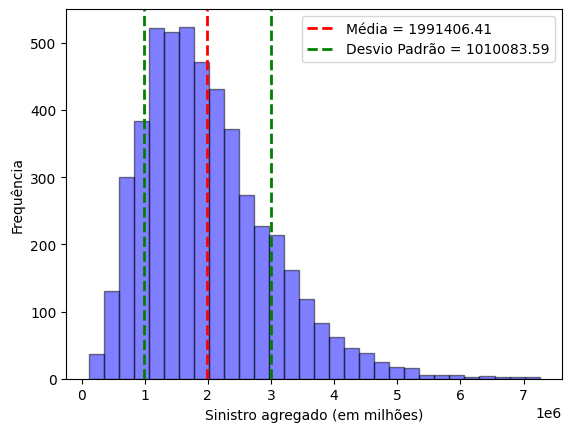

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Gamma vs Binomial negativa (50.000)

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma


# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08


# Quantidade de réplicas de Monte Carlo
B = 30000

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]
for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)
    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_50000_gamma_BN= Soma_sev
Serie_50000_gamma_BN=pd.DataFrame({'Serie_50000_gamma_BN':Serie_50000_gamma_BN})
Serie_50000_gamma_BN.to_excel('Serie_50000_gamma_BN.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34


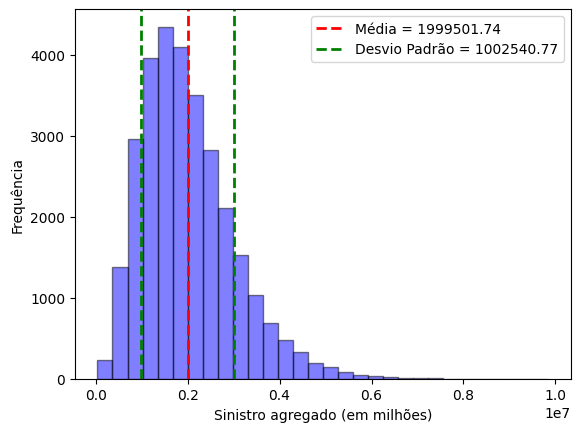

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Poisson vs exponencial

### Poisson vs exponencial (500)

In [ ]:
# Parâmetros da distribuição exponencial
beta = 10000
prob = 0.02
# Parâmetros de franquia e LMI
franquia = float('inf')
LMI = float('inf')

# Quantidade de réplicas de Monte Carlo
B = 500

lista_sinistro=[]
lista_severidade=[]

# Crie uma lista para armazenar as informações

for i in range(B):
    N = np.random.poisson(lam=200, size=1)
    X = np.random.exponential(scale=beta, size=N)
    valor_soma = np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)


In [ ]:
Serie_500_exp_Poi= lista_severidade
Serie_500_exp_Poi=pd.DataFrame({'Serie_500_exp_Poi':Serie_500_exp_Poi})
Serie_500_exp_Poi.to_excel('Serie_500_exp_Poi.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Exponencial Poi',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


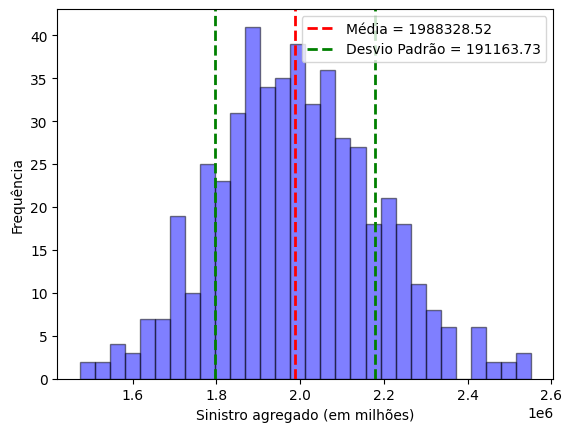

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

# Poisson vs exponencial (5000)

In [ ]:
# Parâmetros da distribuição exponencial
beta = 10000
prob = 0.02
# Parâmetros de franquia e LMI
franquia = float('inf')
LMI = float('inf')

# Quantidade de réplicas de Monte Carlo
B = 5000

lista_sinistro=[]
lista_severidade=[]

# Crie uma lista para armazenar as informações

for i in range(B):
    N = np.random.poisson(lam=200, size=1)
    X = np.random.exponential(scale=beta, size=N)
    valor_soma = np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)


In [ ]:
Serie_5000_exp_Poi= lista_severidade
Serie_5000_exp_Poi=pd.DataFrame({'Serie_5000_exp_Poi':Serie_5000_exp_Poi})
Serie_5000_exp_Poi.to_excel('Serie_5000_exp_Poi.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Exponencial Poi',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


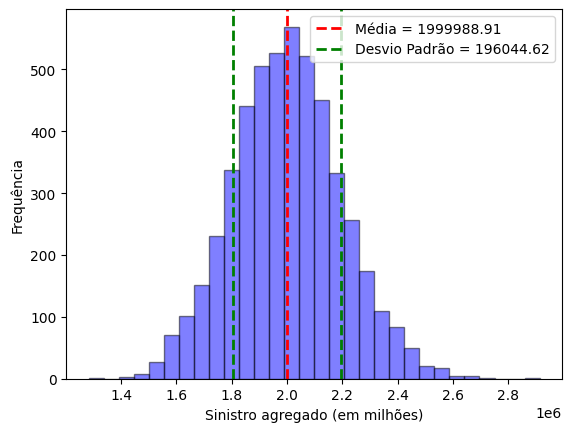

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Poisson vs exponencial (50000)

In [ ]:
# Parâmetros da distribuição exponencial
beta = 10000
prob = 0.02
# Parâmetros de franquia e LMI
franquia = float('inf')
LMI = float('inf')

# Quantidade de réplicas de Monte Carlo
B = 30000

lista_sinistro=[]
lista_severidade=[]

# Crie uma lista para armazenar as informações

for i in range(B):
    N = np.random.poisson(lam=200, size=1)
    X = np.random.exponential(scale=beta, size=N)
    valor_soma = np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)


In [ ]:
Serie_50000_exp_Poi= lista_severidade
Serie_50000_exp_Poi=pd.DataFrame({'Serie_50000_exp_Poi':Serie_50000_exp_Poi})
Serie_50000_exp_Poi.to_excel('Serie_50000_exp_Poi.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Exponencial Poi',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


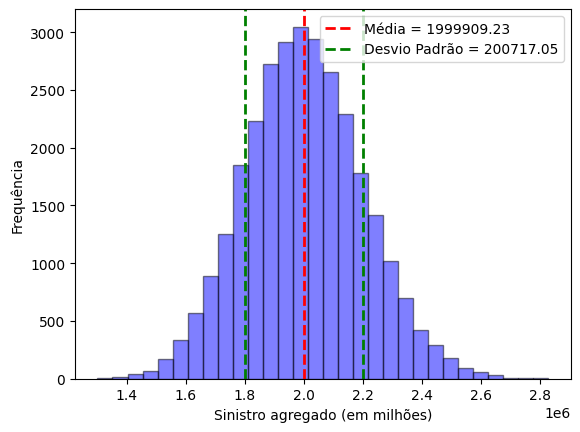

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Condicionais coletiva

### Franquia dedutível 1.000

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
scale_gamma = media_desejada / shape_gamma
shape_gamma = 2



# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 1000
LMI = float('inf')



# Quantidade de réplicas de Monte Carlo
B = 30000
lista_sinistro=[]
lista_severidade=[]
# Crie uma lista para armazenar as informações



for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)





    for j in range(N[0]):


        # if X[j] <= LMI:

        #   X[j] = X[j]

        if X[j] > franquia:

          X[j] = X[j]



        else:

          X[j]=0






    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)



In [ ]:
print(lista_severidade)

[1944349.7889261357, 2610341.7722252533, 726299.5124167962, 3144344.918362571, 1216141.6983156146, 3380897.499543251, 2312111.8338214234, 4973854.045536052, 895801.6287417777, 3730250.5227337983, 1353046.3340444313, 3198325.241615208, 1411766.7211898197, 1088687.707151274, 1105528.9056180068, 1461078.0965700657, 2835317.375417645, 4805653.701076083, 938369.5153665171, 3170097.7615098525, 1756573.211025361, 5311601.836335815, 2069064.8559364541, 1015552.1686419689, 1506264.8333825013, 1393743.856304593, 2364597.1419302532, 3028691.289911566, 995354.0251400563, 1634785.0881185182, 2590707.078489743, 3142726.6190654566, 1181506.63744268, 2497916.0717270207, 764232.3513111501, 3739031.5656371266, 952036.8021311386, 993382.9598533461, 1590842.1866233016, 1499907.5172373042, 1596996.8967186809, 2266292.63761985, 711807.2268812468, 1784855.0381889073, 792074.3378520134, 1414158.976404855, 2629264.3970128563, 2273635.1175377043, 2496794.2927660793, 1562862.2717857528, 2278809.6604250977, 18241

In [ ]:
Serie_franquia_col= lista_severidade
Serie_franquia_col=pd.DataFrame({'Serie_franquia_col':Serie_franquia_col})
Serie_franquia_col.to_excel('Serie_franquia_col.xlsx', index=False)

In [ ]:

qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN FD col',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


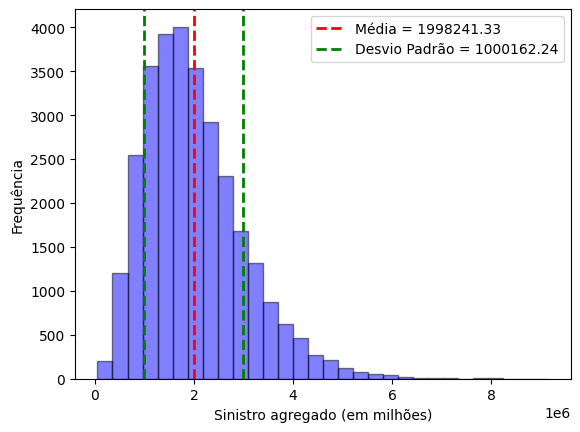

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Limite maximo de indenização 20.000

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
scale_gamma = media_desejada / shape_gamma
shape_gamma = 2


# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 0
LMI = 20000

# Quantidade de réplicas de Monte Carlo
B = 30000
lista_sinistro=[]
lista_severidade=[]

# Crie uma lista para armazenar as informações

for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)

    for j in range(N[0]):
        if X[j] <= LMI:

          X[j] = X[j]


        else:

          X[j]=LMI


    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)


In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN LMI col',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
Serie_limiteMax_col= lista_severidade
Serie_limiteMax_col=pd.DataFrame({'Serie_limiteMax_col':Serie_limiteMax_col})
Serie_limiteMax_col.to_excel('Serie_limiteMax_col.xlsx', index=False)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


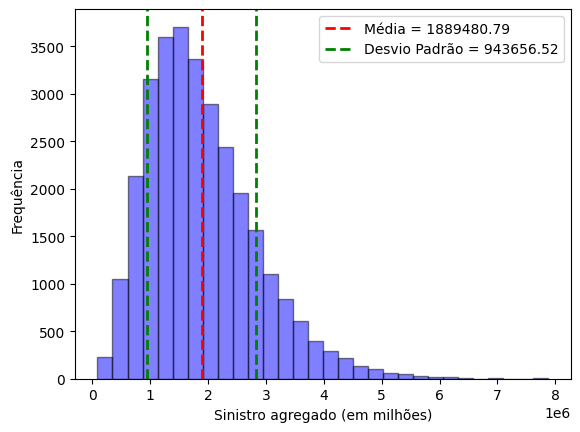

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## FD = 1000 e LMI = 20000

In [ ]:
# Parâmetros da distribuição gama
media_desejada = 10000
scale_gamma = media_desejada / shape_gamma
shape_gamma = 2


# Parâmetros da distribuição de b Negativa
p_nbinom = 0.02
f_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 1000
LMI = 20000

# Quantidade de réplicas de Monte Carlo
B = 30000
lista_sinistro=[]
lista_severidade=[]

# Crie uma lista para armazenar as informações

for i in range(B):
    N = np.random.negative_binomial(n=f_nbinom, p=p_nbinom, size=1)
    X = stats.gamma.rvs(shape_gamma, loc=0, scale=scale_gamma, size=N)
    #print('X: ',X,'N: ',N)

    for j in range(N[0]):
        if franquia < X[j] <= LMI:

          X[j] = X[j]

        elif X[j] <= franquia:
          X[j] = 0

        elif X[j] > LMI:

          X[j]=LMI

    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_Franquia_limiteMax_col= lista_severidade
Serie_Franquia_limiteMax_col=pd.DataFrame({'Serie_Franquia_limiteMax_col':Serie_Franquia_limiteMax_col})
Serie_Franquia_limiteMax_col.to_excel('Serie_Franquia_limiteMax_col.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN LMI e FD col',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


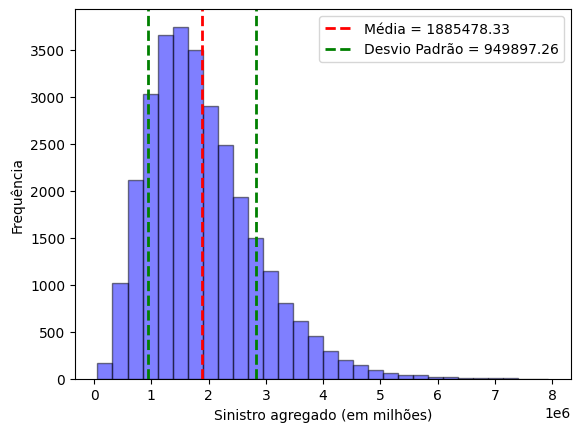

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Condicionais individuais

####  Franquia


In [ ]:
cenarios = 30000
tamanho = 10000
prob_sin = 0.02

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma

Franquia =1000


cenarios = 30000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
condicao = (matriz_final_severidade > Franquia)
matriz_final_severidade = matriz_final_severidade[condicao]


Soma_sev =matriz_final_severidade.sum(axis = 0)
qtd_sin_cen =matriz_sinistros.sum(axis = 0)








In [ ]:
Serie_franquia_ind= lista_severidade
Serie_franquia_ind=pd.DataFrame({'Serie_franquia_ind':Serie_franquia_ind})
Serie_franquia_ind.to_excel('Serie_franquia_ind.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN FD ind',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


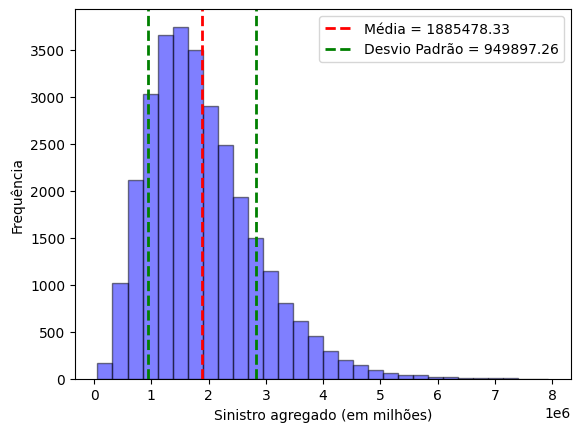

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## LMI

In [ ]:
cenarios = 30000
tamanho = 10000
prob_sin = 0.02

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma

LMI = 20000


cenarios = 30000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
condicao = (matriz_final_severidade <= LMI)
matriz_final_severidade = matriz_final_severidade[condicao]


Soma_sev =matriz_final_severidade.sum(axis = 0)
qtd_sin_cen =matriz_sinistros.sum(axis = 0)




In [ ]:
Serie_limiteMax_ind= lista_severidade
Serie_limiteMax_ind=pd.DataFrame({'Serie_limiteMax_ind':Serie_limiteMax_ind})
Serie_limiteMax_ind.to_excel('Serie_limiteMax_ind.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
    'Distribuição':'Gamma BN LMI ind',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

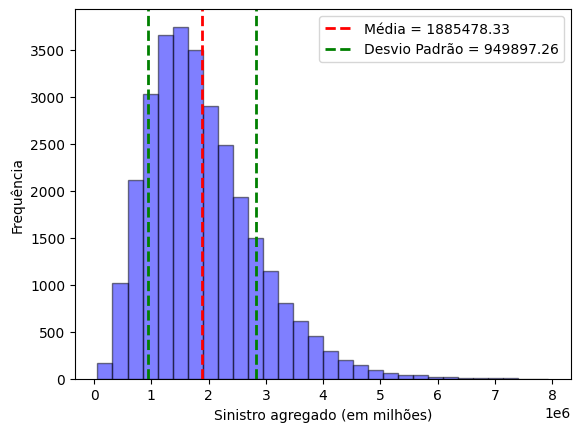

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


## Franquia e Limite maximo

In [ ]:
cenarios = 30000
tamanho = 10000
prob_sin = 0.02

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma

LMI = 20000
Franquia =1000

cenarios = 30000
tamanho = 10000
prob_sin = 0.02
sev_media = 10000

# Parâmetros da distribuição Gama
media_desejada = 10000
shape_gamma = 2
scale_gamma = media_desejada / shape_gamma
size_gamma = 1

# Gere as severidades diretamente em uma matriz
matriz_severidade = np.random.gamma(shape_gamma, scale_gamma, (tamanho, cenarios))

# Gere os sinistros diretamente em uma matriz usando uma compreensão de lista
matriz_sinistros = np.random.uniform(0, 1, (tamanho, cenarios)) < prob_sin

# Converta a lista de sinistros para uma matriz booleana (0/1)
matriz_sinistros = matriz_sinistros.astype(int)

matriz_final_severidade = matriz_sinistros * matriz_severidade
condicao = (matriz_final_severidade > Franquia) & (matriz_final_severidade <= LMI)
matriz_final_severidade = matriz_final_severidade[condicao]


Soma_sev =matriz_final_severidade.sum(axis = 0)
qtd_sin_cen =matriz_sinistros.sum(axis = 0)




In [ ]:
Serie_Franquia_limiteMax_ind= lista_severidade
# Serie_Franquia_limiteMax_ind=pd.DataFrame({'Serie_Franquia_limiteMax_ind':Serie_Franquia_limiteMax_col})
Serie_Franquia_limiteMax_ind.to_excel('Serie_Franquia_limiteMax_ind.xlsx', index=False)

AttributeError: ignored

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Gamma BN FD e LMI ind',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

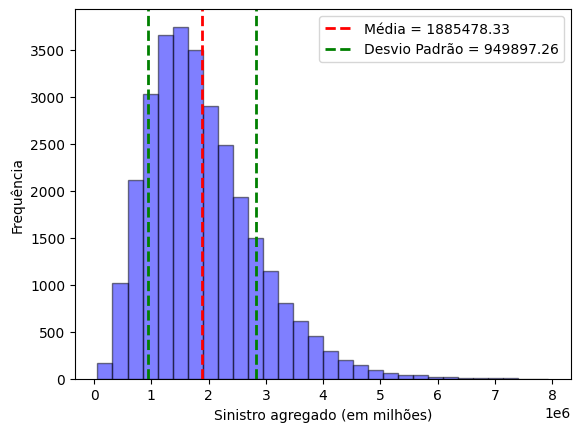

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

In [ ]:
df_info

,Distribuição,Qtde interações,Esperança Sag,Desvio padrão,Esperança sinistros,Desvio padrão sinistros,Prêmio Estatístico,Prêmio Puro,capital_risco_05,capital_risco_003,capital_acionista U0,capital_acionista U1,Maximo severidade,Minimo severidade
0,Gamma,500,2004740.05,160766.12,200.40,13.08,200.47,210.81,2437899.65,2559276.51,329764.35,451141.21,2560346.02,1581843.97
1,Gamma,5000,2001946.27,171238.01,200.40,13.96,200.19,211.60,2454916.54,2571362.13,338911.03,455356.62,2650164.11,1400375.76
2,Gamma,30000,1999335.07,172525.76,200.00,13.99,199.93,211.42,2459688.55,2633634.87,345492.99,519439.31,2736786.26,1364091.01
3,Exponencial,500,1987108.93,206188.75,199.40,13.97,198.71,210.82,2589977.01,2769710.52,481751.13,661484.64,2783815.72,1424160.25
4,Exponencial,5000,2003654.08,198290.08,200.40,13.93,200.37,213.54,2507385.05,2697355.87,371963.95,561934.77,2787745.33,1390871.73
5,Exponencial,30000,2001194.73,198639.05,199.98,13.94,200.12,213.22,2539749.31,2735993.86,407557.42,603801.97,2919408.08,1239722.48
6,Gamma BN,500,1984073.67,993545.40,198.25,97.97,198.41,257.61,5445002.64,6789826.50,2868938.80,4213762.66,6914178.70,209800.39
7,Gamma BN,5000,1991406.41,1010083.59,199.21,100.63,199.14,253.87,5531110.85,7095987.81,2992410.45,4557287.41,7254538.26,112772.86
8,Gamma BN,30000,1999501.74,1002540.77,199.95,99.79,199.95,255.51,5476273.04,7211455.01,2921164.36,4656346.33,9845568.49,40119.34
9,Exponencial Poi,500,1988328.52,191163.73,199.55,13.85,198.83,211.49,2512864.70,2549216.50,397928.56,434280.36,2551398.07,1473644.10


# Proximação com a normal

In [ ]:
# Parâmetros da distribuição gama
shape_gamma = 100  # Aumente o valor para uma melhor aproximação normal
scale_gamma = 10000  # Ajuste conforme necessário

# Parâmetros da distribuição de Binomial Negativa
p_nbinom = 0.02
r_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 0
LMI = float('inf')

# Quantidade de réplicas de Monte Carlo
B = 5000
SAg = np.empty(B)

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]

for i in range(B):
    N = np.random.negative_binomial(n=r_nbinom, p=p_nbinom, size=1)
    X = np.random.normal(loc=shape_gamma * scale_gamma, scale=np.sqrt(shape_gamma) * scale_gamma, size=N[0])

    # for j in range(N[0]):
    #     if X[j] <= LMI:
    #         X[j] = X[j]
    #     else:
    #         X[j] = LMI

    #     if X[j] <= franquia:
    #         X[j] = 0
    #     else:
    #         X[j] = X[j]

    SAg[i] = np.sum(X)


    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_Norm= lista_severidade
Serie_Norm=pd.DataFrame({'Serie_Norm':Serie_Franquia_limiteMax_col})
Serie_Norm.to_excel('Serie_Norm.xlsx', index=False)

ValueError: ignored

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Norm BN',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

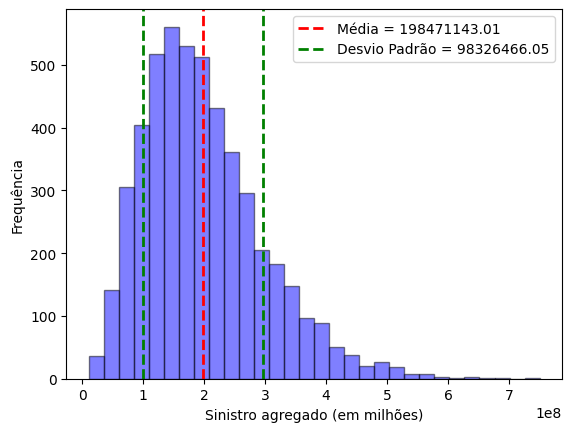

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Condicionais

####  Franquia

In [ ]:
# Parâmetros da distribuição gama
shape_gamma = 100  # Aumente o valor para uma melhor aproximação normal
scale_gamma = 10000  # Ajuste conforme necessário

# Parâmetros da distribuição de Binomial Negativa
p_nbinom = 0.02
r_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 1000
# LMI = float('inf')

# Quantidade de réplicas de Monte Carlo
B = 5000
SAg = np.empty(B)

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]

for i in range(B):
    N = np.random.negative_binomial(n=r_nbinom, p=p_nbinom, size=1)
    X = np.random.normal(loc=shape_gamma * scale_gamma, scale=np.sqrt(shape_gamma) * scale_gamma, size=N[0])

    for j in range(N[0]):
    #     if X[j] <= LMI:
    #         X[j] = X[j]
    #     else:
    #         X[j] = LMI

      if X[j] <= franquia:
        X[j] = 0
      else:
        X[j] = X[j]

    SAg[i] = np.sum(X)


    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_Franquia_Norm= lista_severidade
Serie_Franquia_Norm=pd.DataFrame({'Serie_Franquia_Norm':Serie_Franquia_limiteMax_col})
Serie_Franquia_Norm.to_excel('Serie_Franquia_Norm.xlsx', index=False)

ValueError: ignored

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Norm BN FD',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

####  LMI

In [ ]:
# Parâmetros da distribuição gama
shape_gamma = 100  # Aumente o valor para uma melhor aproximação normal
scale_gamma = 10000  # Ajuste conforme necessário

# Parâmetros da distribuição de Binomial Negativa
p_nbinom = 0.02
r_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 0
LMI = 20000

# Quantidade de réplicas de Monte Carlo
B = 5000
SAg = np.empty(B)

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]

for i in range(B):
    N = np.random.negative_binomial(n=r_nbinom, p=p_nbinom, size=1)
    X = np.random.normal(loc=shape_gamma * scale_gamma, scale=np.sqrt(shape_gamma) * scale_gamma, size=N[0])

    for j in range(N[0]):
        if X[j] <= LMI:
            X[j] = X[j]
        else:
            X[j] = LMI

      # if X[j] <= franquia:
      #   X[j] = 0
      # else:
      #   X[j] = X[j]

    SAg[i] = np.sum(X)


    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_LMI_Norm= lista_severidade
# Serie_LMI_Norm=pd.DataFrame({'Serie_limiteMax_Norm':Serie_Franquia_limiteMax_col})
Serie_LMI_Norm.to_excel('Serie_limiteMax_Norm.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Norm BN LMI',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

####  Franquia e LMI

In [ ]:
# Parâmetros da distribuição gama
shape_gamma = 100  # Aumente o valor para uma melhor aproximação normal
scale_gamma = 10000  # Ajuste conforme necessário

# Parâmetros da distribuição de Binomial Negativa
p_nbinom = 0.02
r_nbinom = 4.08

# Parâmetros de franquia e LMI
franquia = 1000
LMI = 20000

# Quantidade de réplicas de Monte Carlo
B = 5000
SAg = np.empty(B)

# Crie uma lista para armazenar as informações
lista_sinistro=[]
lista_severidade=[]

for i in range(B):
    N = np.random.negative_binomial(n=r_nbinom, p=p_nbinom, size=1)
    X = np.random.normal(loc=shape_gamma * scale_gamma, scale=np.sqrt(shape_gamma) * scale_gamma, size=N[0])

    for j in range(N[0]):
        if franquia < X[j] <= LMI:

          X[j] = X[j]

        elif X[j] <= franquia:
          X[j] = 0

        elif X[j] > LMI:

          X[j]=LMI

    SAg[i] = np.sum(X)


    valor_soma =np.sum(X)
    lista_severidade.append(valor_soma)
    lista_sinistro.append(N)

In [ ]:
Serie_LMI_Franquia_Norm= lista_severidade
# Serie_LMI_Franquia_Norm=pd.DataFrame({'Serie_Franquia_limiteMax_Norm':Serie_Franquia_limiteMax_col})
Serie_LMI_Franquia_Norm.to_excel('Serie_Franquia_limiteMax_Norm.xlsx', index=False)

In [ ]:
qtd_sin_cen = lista_sinistro
Soma_sev = lista_severidade
media_Sag = round(np.mean(Soma_sev),2)  # Espreança da severidade agregada
dp_SAg = round(np.std(Soma_sev),2)   # desvio padrão da severidade agregada

Media_qtde_sin =round(np.mean(qtd_sin_cen),2) # Media esperda qtde sinistros
Dp_qtde_sin = round(np.std(qtd_sin_cen),2)    # Media desvio padrão sinstros

## Prêmio Estatistico
Premio_est = round(media_Sag/10000 ,2)

## Provisão carregada
Prov_carr  = round(np.percentile(Soma_sev, 75),2)

# Prêmio puro
PP = round(Prov_carr/10000 ,2)

## Solvencia
# Capital de solvência com probabilidade de ruína máxima em 0,5%
capital_risco_05 = round(np.percentile(Soma_sev, 99.5),2)

# Capital de solvência com probabilidade de ruína máxima em 0,03%
capital_risco_003 = round(np.percentile(Soma_sev, 99.97),2)

maximo_sev = max(Soma_sev)
minimo_sev = min(Soma_sev)

## CABR
U0 = round(capital_risco_05 - Prov_carr,2)
U1 = round(capital_risco_003 - Prov_carr,2)

# Adicione uma nova linha de informações
nova_informacao = {
   'Distribuição':'Norm BN FD LMI',
   'Qtde interações': B,
   'Esperança Sag': round(media_Sag, 2),
   'Desvio padrão': round(dp_SAg, 2),
   'Esperança sinistros': round(Media_qtde_sin, 2),
   'Desvio padrão sinistros': round(Dp_qtde_sin, 2),
   'Prêmio Estatístico': round(Premio_est, 2),
   'Prêmio Puro': round(PP, 2),
   'capital_risco_05': round(capital_risco_05, 2),
   'capital_risco_003': round(capital_risco_003, 2),
   'capital_acionista U0': round(U0, 2),
   'capital_acionista U1': round(U1, 2),
   'Maximo severidade': round(maximo_sev, 2),
   'Minimo severidade': round(minimo_sev, 2)
}

# Crie um novo DataFrame com a nova informação
novo_df = pd.DataFrame([nova_informacao])

# Concatene o novo DataFrame com o DataFrame existente
df_info = pd.concat([df_info, novo_df], ignore_index=True)

In [ ]:
plt.hist(Soma_sev, bins=30, alpha=0.5, color='b',  edgecolor='k')

variancia = round(np.var(Soma_sev),2)
media = round(np.mean(Soma_sev),2)

# Adicione linhas verticais para a média e a variância
plt.axvline(media, color='r', linestyle='dashed', linewidth=2, label=f'Média = {media:.2f}')
plt.axvline(media + np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2, label=f'Desvio Padrão = {np.sqrt(variancia):.2f}')
plt.axvline(media - np.sqrt(variancia), color='g', linestyle='dashed', linewidth=2)

# Configure rótulos e legenda
plt.xlabel('Sinistro agregado (em milhões)')
plt.ylabel('Frequência')
plt.legend()
#plt.savefig('histograma_500_gamma_ind.png')
# Exiba o histograma
plt.show()

## Condicionais gráficos

### Sob perspectivas agregada

In [ ]:
dados1 = Serie_Franquia_limiteMax_col
dados2 = Serie_franquia_col
dados3 = Serie_limiteMax_col
dados4 = Serie_50000_gamma_BN

# Plot do histograma com linha de contorno
plt.hist(Serie_Franquia_limiteMax_col, bins=20, density=True, color='blue', alpha=0.7, label='Com franquia e Limite máximo', histtype='step')
plt.hist(Serie_franquia_col, bins=20, density=True, color='red', alpha=0.7, label='Com franquia', histtype='step')
plt.hist(Serie_limiteMax_col, bins=20, density=True, color='black', alpha=0.7, label='Com Limite máximo', histtype='step')
plt.hist(Serie_50000_gamma_BN, bins=20, density=True, color='yellow', alpha=0.7, label='Sem franquia e Limite máximo', histtype='step')
# Calcular a média dos dados

# Definir rótulos dos eixos e título
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Sob perspectiva agregada')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


In [ ]:
dados1 = Serie_Franquia_limiteMax_col
dados2 = Serie_franquia_col
dados3 = Serie_limiteMax_col
dados4 = Serie_50000_gamma_BN

data = [dados1, dados2, dados3,dados4]

sns.boxplot(data=data, showfliers=False)
plt.xticks([0, 1, 2, 3], ['Com LMI E FD', 'Com FD', 'Com LMI ', 'SEM LMI E FD'])  # Rótulos para cada grupo

# Adicionar legendas
plt.legend(['Com FD e LMI', 'Com FD', 'Com LMI', 'Sem FD e LMI'])

# Definir rótulos dos eixos e título
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Sob perspectivas agregada')
plt.show()


### Sob perspectiva individual



In [ ]:
dados1 = Serie_Franquia_limiteMax_ind
dados2 = Serie_franquia_ind
dados3 = Serie_limiteMax_ind
dados4 = Serie_50000_gamma_BN

# Plot do histograma com linha de contorno
plt.hist(Serie_Franquia_limiteMax_ind, bins=20, density=True, color='blue', alpha=0.7, label='Com franquia e Limite máximo', histtype='step')
plt.hist(Serie_franquia_ind, bins=20, density=True, color='red', alpha=0.7, label='Com franquia', histtype='step')
plt.hist(Serie_limiteMax_ind, bins=20, density=True, color='black', alpha=0.7, label='Com Limite máximo', histtype='step')
plt.hist(Serie_50000_gamma_BN, bins=20, density=True, color='yellow', alpha=0.7, label='Sem franquia e Limite máximo', histtype='step')
# Calcular a média dos dados

# Definir rótulos dos eixos e título
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.title('Sob perspectiva individual')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dados1 = Serie_Franquia_limiteMax_ind
dados2 = Serie_franquia_ind
dados3 = Serie_limiteMax_ind
dados4 = Serie_50000_gamma_BN

data = [dados1, dados2, dados3, dados4]

# Aumentar o tamanho da figura (figsize)
plt.figure(figsize=(10, 6))

# Criar um boxplot e adicionar legendas
sns.boxplot(data=data, showfliers=False)  # O argumento showfliers=False remove os outliers
plt.xticks([0, 1, 2, 3], ['Com LMI E FD', 'Com FD', 'Com LMI', 'SEM LMI E FD'])  # Rótulos para cada grupo

# Adicionar legendas
plt.legend(['Com FD e LMI', 'Com FD', 'Com LMI', 'Sem FD e LMI'])

# Definir rótulos dos eixos e título
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.title('Sob perspectiva individual')

plt.show()


### Sob perspectivas individual

In [ ]:


# Gere quatro conjuntos de dados aleatórios (substitua isso pelos seus próprios dados)
dados1 = Serie_franquia_limiteMax_ind
dados2 = Serie_franquia_ind
dados3 = Serie_limiteMax_ind
dados4 = Serie_50000_gamma

# Crie um intervalo de valores para o eixo x
x = np.linspace(-5, 5, 1000)

# Calcule as funções de densidade de probabilidade para cada conjunto de dados
pdf1 = norm.pdf(x, np.mean(dados1), np.std(dados1))
pdf2 = norm.pdf(x, np.mean(dados2), np.std(dados2))
pdf3 = norm.pdf(x, np.mean(dados3), np.std(dados3))
pdf4 = norm.pdf(x, np.mean(dados4), np.std(dados4))

# Crie um gráfico de densidade sobreposto para cada conjunto de dados
plt.figure(figsize=(8, 6))
plt.plot(x, pdf1, label='Com franquia e Limite máximo')
plt.plot(x, pdf2, label='Com franquia')
plt.plot(x, pdf3, label='Com Limite máximo')
plt.plot(x, pdf4, label='Sem franquia e Limite máximo')

# Personalize o gráfico
plt.title('Sob perspectivas individual')
plt.xlabel('Sinistros agregado (em R$ milhoes)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)

# Exiba o gráfico
plt.show()

